In [1]:
%pip install pygad==2.3.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pygad
import numpy

In [3]:
print(pygad.__version__)

2.3.0


In [4]:
def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

In [5]:
function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

fitness_function = fitness_func

num_generations = 100
num_parents_mating = 7

sol_per_pop = 50
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 7

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10
last_fitness = 0

In [6]:
def callback_generation2(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=(ga_instance.best_solution()[1] - last_fitness)))
    last_fitness = ga_instance.best_solution()[1]


In [7]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation2)

Generation = 1
Fitness    = 1.0526773492166148
Change     = 1.0526773492166148
Generation = 2
Fitness    = 2.36841052885
Change     = 1.3157331796333853
Generation = 3
Fitness    = 11.327492572667426
Change     = 8.959082043817425
Generation = 4
Fitness    = 12.962731102068629
Change     = 1.635238529401203
Generation = 5
Fitness    = 179.36137789448765
Change     = 166.39864679241902
Generation = 6
Fitness    = 179.36137789448765
Change     = 0.0
Generation = 7
Fitness    = 179.36137789448765
Change     = 0.0
Generation = 8
Fitness    = 179.36137789448765
Change     = 0.0
Generation = 9
Fitness    = 179.36137789448765
Change     = 0.0
Generation = 10
Fitness    = 282.3135163366594
Change     = 102.95213844217176
Generation = 11
Fitness    = 282.3135163366594
Change     = 0.0
Generation = 12
Fitness    = 282.3135163366594
Change     = 0.0
Generation = 13
Fitness    = 282.3135163366594
Change     = 0.0
Generation = 14
Fitness    = 282.3135163366594
Change     = 0.0
Generation = 15
Fitne

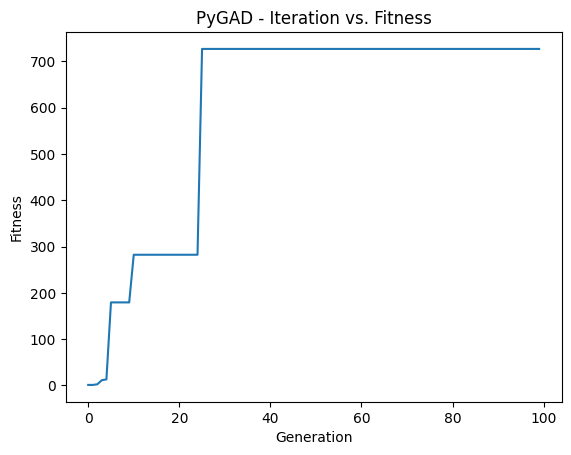

In [8]:
ga_instance.run()

ga_instance.plot_result()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [9]:
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Parameters of the best solution : [ 3.0425341   0.04186889  3.57300176  0.8919766  -0.90618769 -1.05989851]
Fitness value of the best solution = 727.0513598987262
Index of the best solution : 0
Predicted output based on the best solution : 44.00137541865012
Best fitness value reached after 25 generations.
